# Require library

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
!pip install -U ultralytics -q

In [3]:
from ultralytics import YOLO

# Preprocess label and data

In [4]:
import shutil
def convert_to_bounding(path, name):
    klass = path.split('/')[-3]
    os.makedirs(f'/kaggle/working/{klass}/labels', exist_ok=True)
    os.makedirs(f'/kaggle/working/{klass}/images', exist_ok=True)
    for mask_name in tqdm(os.listdir(path)):
#         print(mask_name)
        mask = cv2.imread(f'{path}/{mask_name}', 0)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        string_list = []
        for contour in contours:
            contour = np.squeeze(contour)
            
            if len(contour) == 2:
                continue
            
            string = name
            for x, y in contour:
                string += f' {x/mask.shape[0]} {y/mask.shape[1]}'
            string_list.append(string + '\n')
                
        with open(f'/kaggle/working/{klass}/labels/{mask_name[:-4]}.txt', 'w') as label:
            for string in string_list:
                label.writelines(string)
        image_path = "/".join(path.split("/")[:-1]) + '/images'
        shutil.copy(f'{image_path}/{mask_name}', f'/kaggle/working/{klass}/images/{mask_name}')

In [5]:
# Test
convert_to_bounding('/kaggle/input/covidqu/Infection Segmentation Data/Infection Segmentation Data/Test/COVID-19/infection masks', '0')
convert_to_bounding('/kaggle/input/covidqu/Infection Segmentation Data/Infection Segmentation Data/Test/Non-COVID/infection masks', '1')
convert_to_bounding('/kaggle/input/covidqu/Infection Segmentation Data/Infection Segmentation Data/Test/Normal/infection masks', '2')

100%|██████████| 291/291 [00:05<00:00, 49.53it/s]


In [6]:
# Train
convert_to_bounding('/kaggle/input/covidqu/Infection Segmentation Data/Infection Segmentation Data/Train/COVID-19/infection masks', '0')
convert_to_bounding('/kaggle/input/covidqu/Infection Segmentation Data/Infection Segmentation Data/Train/Non-COVID/infection masks', '1')
convert_to_bounding('/kaggle/input/covidqu/Infection Segmentation Data/Infection Segmentation Data/Train/Normal/infection masks', '2')

100%|██████████| 932/932 [00:18<00:00, 49.53it/s]


In [7]:
# Val
convert_to_bounding('/kaggle/input/covidqu/Infection Segmentation Data/Infection Segmentation Data/Val/COVID-19/infection masks', '0')
convert_to_bounding('/kaggle/input/covidqu/Infection Segmentation Data/Infection Segmentation Data/Val/Non-COVID/infection masks', '1')
convert_to_bounding('/kaggle/input/covidqu/Infection Segmentation Data/Infection Segmentation Data/Val/Normal/infection masks', '2')

100%|██████████| 233/233 [00:05<00:00, 46.44it/s]


# Train

In [8]:
with open('/kaggle/working/data.yaml', 'w') as data:
    data.write(
    '''
    # Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: /kaggle/working # dataset root dir
train: Train/images  # train images (relative to 'path') 4 images
val: Val/images  # val images (relative to 'path') 4 images
test:  Test/images (optional)

# Classes dictionary
names:
  0: COVID
  1: Non-COVID
  2: Normal
    ''')

In [9]:
model = YOLO('yolov8n-seg.pt')

100%|██████████| 6.73M/6.73M [00:00<00:00, 173MB/s]


In [4]:
model = YOLO('/kaggle/working/runs/segment/train/weights/last.pt')

In [5]:
# Resume training
results = model.train(resume=True)

Ultralytics YOLOv8.1.29 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=segment, mode=train, model=/kaggle/working/runs/segment/train/weights/last.pt, data=/kaggle/working/data.yaml, epochs=50, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

100%|██████████| 755k/755k [00:00<00:00, 116MB/s]
2024-03-18 05:35:18,562	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-18 05:35:19,356	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-18 05:35:21.689688: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-18 05:35:21.689806: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-18 05:35:21.823287: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factor

TensorBoard: Start with 'tensorboard --logdir runs/segment/train', view at http://localhost:6006/


wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /kaggle/working/Train/labels.cache... 3728 images, 1864 backgrounds, 0 corrupt: 100%|██████████| 3728/3728 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/Val/labels.cache... 932 images, 466 backgrounds, 0 corrupt: 100%|██████████| 932/932 [00:00<?, ?it/s]


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Resuming training from /kaggle/working/runs/segment/train/weights/last.pt from epoch 27 to 50 total epochs
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      14.4G      1.082      1.972       1.13      1.238         33        640: 100%|██████████| 59/59 [01:04<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.13it/s]

                   all        932        931      0.753      0.675      0.758      0.511       0.75      0.679      0.743      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      12.5G       1.08      1.941      1.101      1.226         33        640: 100%|██████████| 59/59 [01:00<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.17it/s]

                   all        932        931      0.764      0.563      0.671      0.417      0.769      0.561       0.66      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      12.5G      1.067      1.928      1.082      1.229         31        640: 100%|██████████| 59/59 [01:01<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.13it/s]

                   all        932        931      0.626      0.582      0.615      0.399      0.621       0.58      0.601      0.372



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      12.5G      1.046      1.912      1.088      1.219         37        640: 100%|██████████| 59/59 [01:00<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.11it/s]

                   all        932        931       0.75      0.639      0.737      0.505      0.751       0.64      0.725      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      12.5G      1.026      1.907      1.058      1.209         36        640: 100%|██████████| 59/59 [01:01<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.14it/s]

                   all        932        931      0.759       0.64      0.746        0.5      0.754      0.636       0.73      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      12.5G      1.031      1.898      1.036      1.208         33        640: 100%|██████████| 59/59 [01:01<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.18it/s]

                   all        932        931      0.744      0.579      0.678      0.456      0.739      0.579      0.673      0.421



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      12.5G      1.025      1.897      1.025      1.207         38        640: 100%|██████████| 59/59 [01:01<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.12it/s]


                   all        932        931       0.76      0.625      0.715      0.466      0.766      0.618      0.712       0.44

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      12.5G      1.009      1.872       1.01        1.2         32        640: 100%|██████████| 59/59 [01:01<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]

                   all        932        931      0.782        0.7      0.773      0.517      0.797      0.676      0.754       0.48



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      12.5G      1.027        1.9      1.038      1.217         26        640: 100%|██████████| 59/59 [01:01<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.13it/s]

                   all        932        931       0.81      0.655      0.773      0.509      0.789      0.664      0.758      0.475



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      12.5G      1.027      1.897      1.037      1.213         24        640: 100%|██████████| 59/59 [01:01<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.18it/s]


                   all        932        931       0.75      0.548      0.647      0.436      0.755       0.55      0.643      0.404

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      12.5G     0.9948      1.874     0.9752      1.196         32        640: 100%|██████████| 59/59 [01:01<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.13it/s]

                   all        932        931      0.736      0.651      0.736       0.49      0.702      0.658      0.709      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      12.5G      1.008      1.817     0.9762        1.2         32        640: 100%|██████████| 59/59 [01:01<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        932        931       0.66      0.668      0.694       0.47      0.668      0.649      0.682      0.433



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      12.5G     0.9834      1.838      1.004      1.187         20        640: 100%|██████████| 59/59 [01:01<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.11it/s]

                   all        932        931      0.762      0.668      0.771      0.521      0.779      0.662      0.764      0.481



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      12.5G      0.986      1.836     0.9736      1.183         35        640: 100%|██████████| 59/59 [01:01<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.16it/s]


                   all        932        931      0.814      0.607      0.738      0.511      0.797      0.603      0.728      0.472
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      12.4G      1.015      1.815     0.9892      1.291         12        640: 100%|██████████| 59/59 [01:03<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.12it/s]

                   all        932        931        0.8      0.709      0.795      0.543      0.797      0.706      0.786      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      12.4G     0.9849      1.791      0.977       1.28         13        640: 100%|██████████| 59/59 [00:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]

                   all        932        931      0.788      0.677       0.78      0.532      0.784      0.674      0.771      0.498



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      12.4G     0.9723      1.758     0.9239      1.254         18        640: 100%|██████████| 59/59 [00:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.14it/s]

                   all        932        931      0.793      0.678      0.785       0.54      0.816      0.664      0.772      0.505



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      12.4G     0.9594      1.765     0.9348      1.252         22        640: 100%|██████████| 59/59 [00:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.12it/s]

                   all        932        931      0.783      0.698      0.779       0.53      0.787      0.685      0.768      0.498



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      12.4G       0.96      1.746     0.9116      1.247         21        640: 100%|██████████| 59/59 [00:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.13it/s]

                   all        932        931      0.808      0.695      0.792      0.545      0.808      0.686      0.778      0.512



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      12.4G     0.9421      1.699     0.8784      1.236         16        640: 100%|██████████| 59/59 [00:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.13it/s]

                   all        932        931      0.802      0.697      0.788      0.542      0.814      0.682      0.777      0.509



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      12.4G     0.9293      1.716     0.8816      1.226         12        640: 100%|██████████| 59/59 [00:59<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.16it/s]

                   all        932        931      0.781      0.695      0.781      0.537        0.8      0.684      0.775      0.507



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      11.3G     0.9255      1.669     0.8601      1.223         16        640: 100%|██████████| 59/59 [00:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.17it/s]

                   all        932        931      0.802       0.71      0.798      0.555      0.805       0.71      0.791      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      11.3G     0.9188      1.694      0.843      1.233         15        640: 100%|██████████| 59/59 [00:59<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.18it/s]

                   all        932        931      0.805      0.707      0.791       0.54       0.82      0.702      0.784      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      11.3G     0.9017      1.656     0.8452      1.207         14        640: 100%|██████████| 59/59 [00:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.20it/s]


                   all        932        931      0.812      0.687      0.792      0.547      0.824      0.687       0.79      0.511

24 epochs completed in 0.464 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.1.29 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258649 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.26s/it]


                   all        932        931      0.803       0.71      0.798      0.554      0.804       0.71      0.791      0.514
                 COVID        932        931      0.803       0.71      0.798      0.554      0.804       0.71      0.791      0.514
Speed: 0.2ms preprocess, 3.1ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/segment/train


lr/pg0,█▇▇▇▇▆▆▆▅▅▅▅▄▄▄▃▃▃▂▂▂▂▁▁
lr/pg1,█▇▇▇▇▆▆▆▅▅▅▅▄▄▄▃▃▃▂▂▂▂▁▁
lr/pg2,█▇▇▇▇▆▆▆▅▅▅▅▄▄▄▃▃▃▂▂▂▂▁▁
metrics/mAP50(B),▆▃▁▆▆▃▅▇▇▂▆▄▇▆█▇█▇██▇███
metrics/mAP50(M),▆▃▁▆▆▄▅▇▇▃▅▄▇▆█▇▇▇█▇▇███
metrics/mAP50-95(B),▆▂▁▆▆▄▄▆▆▃▅▄▆▆▇▇▇▇█▇▇█▇█
metrics/mAP50-95(M),▆▂▁▆▆▃▄▆▆▃▅▄▆▆▇▇█▇██████
metrics/precision(B),▆▆▁▆▆▅▆▇█▆▅▂▆█▇▇▇▇██▇███
metrics/precision(M),▆▆▁▆▆▅▆▇▇▆▄▃▇▇▇▇█▇██▇▇█▇
metrics/recall(B),▆▂▂▅▅▂▄█▆▁▅▆▆▄█▇▇▇▇▇▇███
metrics/recall(M),▇▁▂▅▅▂▄▆▆▁▆▅▆▃█▆▆▇▇▇▇███


In [10]:
result = model.train(data = '/kaggle/working/data.yaml', epochs=50, batch=64)

Ultralytics YOLOv8.1.29 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/kaggle/working/data.yaml, epochs=50, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

100%|██████████| 755k/755k [00:00<00:00, 87.7MB/s]
2024-03-18 03:50:50,886	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-18 03:50:51,677	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-18 03:50:53.830605: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-18 03:50:53.830784: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-18 03:50:53.958160: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ·········································


wandb: ERROR API key must be 40 characters long, yours was 41
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 247MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/Train/labels... 3728 images, 1864 backgrounds, 0 corrupt: 100%|██████████| 3728/3728 [00:03<00:00, 1083.43it/s]


train: New cache created: /kaggle/working/Train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/Val/labels... 932 images, 466 backgrounds, 0 corrupt: 100%|██████████| 932/932 [00:00<00:00, 1037.47it/s]


val: New cache created: /kaggle/working/Val/labels.cache
Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      14.4G       1.52      3.157      3.147      1.614         33        640: 100%|██████████| 59/59 [01:04<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.06s/it]

                   all        932        931      0.406      0.358      0.308      0.139      0.377      0.315       0.25      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      12.6G      1.355      2.421       2.19      1.419         33        640: 100%|██████████| 59/59 [01:00<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        932        931      0.402      0.346      0.317      0.115      0.236      0.125      0.084      0.018



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      12.6G      1.396      2.419      1.893      1.428         31        640: 100%|██████████| 59/59 [01:01<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        932        931      0.024      0.015    0.00812    0.00236    0.00686     0.0043    0.00153   0.000329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      12.6G      1.395      2.391      1.762      1.428         37        640: 100%|██████████| 59/59 [01:00<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        932        931      0.331      0.412      0.258      0.113      0.298      0.345        0.2     0.0827



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      12.6G      1.327      2.335      1.602      1.397         36        640: 100%|██████████| 59/59 [01:00<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        932        931      0.447      0.466       0.42      0.213      0.446      0.459      0.418      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      12.6G      1.293      2.279       1.49      1.369         33        640: 100%|██████████| 59/59 [01:00<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.13it/s]

                   all        932        931      0.572      0.469       0.49      0.275      0.553      0.451      0.463      0.247



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      12.6G      1.265      2.258      1.454      1.352         38        640: 100%|██████████| 59/59 [01:00<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.12it/s]

                   all        932        931      0.349       0.49      0.341       0.18      0.318      0.469      0.298       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      12.6G      1.247      2.212      1.398       1.34         32        640: 100%|██████████| 59/59 [01:00<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.13it/s]

                   all        932        931      0.635      0.619      0.654      0.403      0.629      0.613      0.638      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      12.6G      1.235      2.232      1.401      1.348         26        640: 100%|██████████| 59/59 [01:00<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.11it/s]

                   all        932        931       0.62      0.618      0.616      0.383      0.608      0.586      0.581      0.349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      12.6G      1.236        2.2      1.411      1.342         24        640: 100%|██████████| 59/59 [01:00<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.12it/s]

                   all        932        931      0.619      0.454      0.529      0.332      0.616      0.463      0.525       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      12.6G      1.188      2.163      1.288      1.317         32        640: 100%|██████████| 59/59 [01:01<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.12it/s]

                   all        932        931       0.64      0.589      0.629       0.41      0.632      0.585       0.61      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      12.6G      1.208      2.125      1.325      1.324         32        640: 100%|██████████| 59/59 [01:01<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.11it/s]

                   all        932        931      0.538       0.61      0.537      0.345      0.522      0.609      0.517      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      12.6G      1.172       2.14      1.345      1.305         20        640: 100%|██████████| 59/59 [01:00<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.11it/s]

                   all        932        931      0.676      0.508      0.585      0.363      0.664      0.488      0.555       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      12.6G      1.177      2.109      1.282      1.299         35        640: 100%|██████████| 59/59 [01:00<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.13it/s]

                   all        932        931      0.664      0.528      0.592      0.349      0.629       0.51      0.548      0.279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      12.6G      1.157      2.111      1.282      1.295         27        640: 100%|██████████| 59/59 [01:00<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.12it/s]

                   all        932        931      0.601      0.508       0.56      0.356      0.578      0.505      0.538      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      12.6G      1.165      2.077      1.265      1.293         18        640: 100%|██████████| 59/59 [01:00<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        932        931      0.702      0.631      0.704      0.449      0.733       0.58      0.676      0.423



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      12.6G      1.136      2.027      1.217      1.274         20        640: 100%|██████████| 59/59 [01:01<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        932        931      0.698      0.622       0.69      0.445      0.692      0.617      0.678      0.407



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      12.6G       1.13      2.029      1.206      1.271         27        640: 100%|██████████| 59/59 [01:01<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.12it/s]

                   all        932        931      0.684       0.62      0.667      0.381      0.696      0.607       0.66      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      12.6G      1.121      2.032      1.202      1.265         29        640: 100%|██████████| 59/59 [01:01<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]

                   all        932        931      0.693      0.626      0.694      0.452      0.679      0.613      0.672      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      12.6G      1.115      2.027      1.165      1.265         21        640: 100%|██████████| 59/59 [01:01<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]

                   all        932        931      0.713      0.554      0.652       0.42      0.719      0.539      0.647      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      12.6G      1.115      2.016      1.191       1.27         28        640: 100%|██████████| 59/59 [01:01<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        932        931      0.698      0.628      0.683      0.458      0.682      0.604      0.653      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      12.6G      1.121       2.02      1.183      1.267         28        640: 100%|██████████| 59/59 [01:01<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.11it/s]

                   all        932        931       0.68      0.651      0.685      0.421      0.709      0.626       0.68      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      12.6G      1.085      1.972      1.128      1.244         31        640: 100%|██████████| 59/59 [01:01<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]

                   all        932        931      0.665      0.664      0.704      0.456      0.684      0.654      0.688      0.419



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      12.6G      1.085      1.977      1.132      1.249         34        640: 100%|██████████| 59/59 [01:01<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]

                   all        932        931      0.753      0.671       0.76      0.485      0.736      0.636      0.728      0.451



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      12.6G      1.091      1.986      1.123      1.253         30        640: 100%|██████████| 59/59 [01:01<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]

                   all        932        931      0.729      0.554      0.649      0.429      0.723      0.553      0.637      0.393



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      12.6G       1.08      1.952      1.113      1.234         23        640: 100%|██████████| 59/59 [01:01<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]

                   all        932        931      0.757      0.594      0.708      0.473      0.767      0.596      0.699      0.437



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/59 [00:00<?, ?it/s]


KeyboardInterrupt: 

# Inference

In [4]:
model = YOLO('/kaggle/working/runs/segment/train/weights/best.pt')

## 1 image


0: 640x640 (no detections), 9.2ms
Speed: 3.4ms preprocess, 9.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 COVIDs, 8.2ms
Speed: 2.4ms preprocess, 8.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


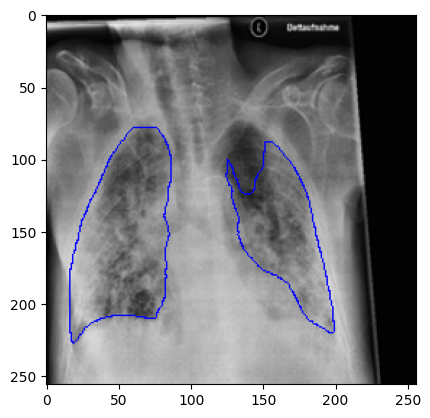


0: 640x640 2 COVIDs, 8.2ms
Speed: 2.4ms preprocess, 8.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


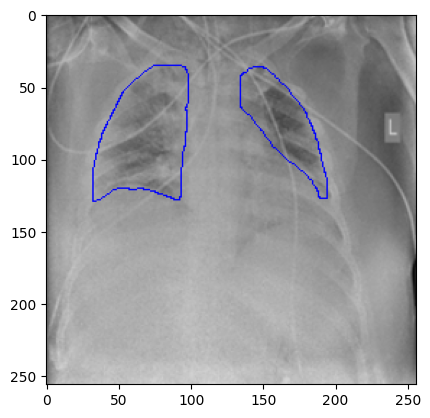


0: 640x640 2 COVIDs, 9.7ms
Speed: 3.8ms preprocess, 9.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


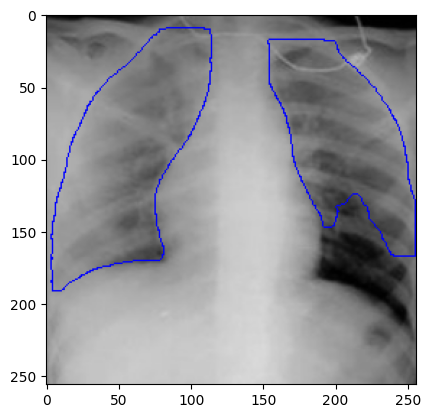


0: 640x640 (no detections), 9.3ms
Speed: 3.5ms preprocess, 9.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 COVIDs, 7.9ms
Speed: 2.4ms preprocess, 7.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


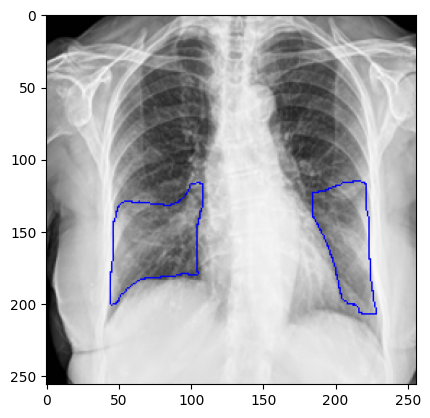


0: 640x640 1 COVID, 8.8ms
Speed: 2.5ms preprocess, 8.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


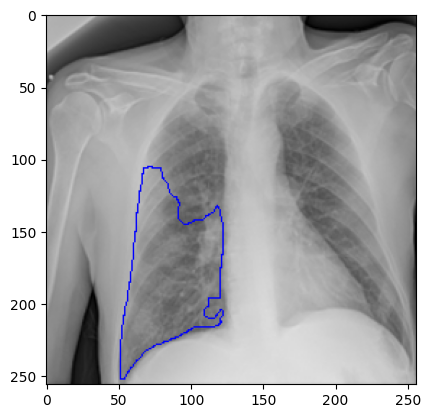


0: 640x640 2 COVIDs, 7.8ms
Speed: 2.4ms preprocess, 7.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


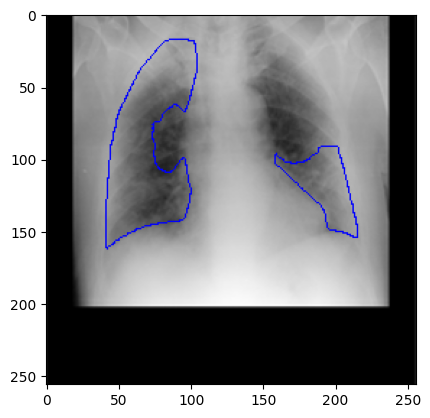


0: 640x640 (no detections), 8.5ms
Speed: 2.8ms preprocess, 8.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.2ms
Speed: 2.4ms preprocess, 8.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


In [18]:
path = '/kaggle/working/Test/images/'

for img_name in os.listdir(path)[:10]:
    

    img = cv2.imread(f'{path}/{img_name}')
    results = model.predict(img)[0]
    
    if results.masks is None:
        continue

    color = (0, 0, 255)

    # Draw
    for cat, score, mask in zip(results.boxes.cls, results.boxes.conf, results.masks.xy):
        mask = mask.reshape(-1, 1, 2)
        cv2.polylines(img, np.int32([mask]), isClosed=True, color=color, thickness=1)

    plt.imshow(img)
    plt.show()
